In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./lol_data_1/training')
validation_path = pathlib.Path('./lol_data_1/valid')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)

2.1.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
numpy 1.18.1
pandas 0.23.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
Training Images ->  453018
Validation Images ->  78668


In [2]:
train_image_paths[:5]

['lol_data_1\\training\\Braum\\4021.jpg',
 'lol_data_1\\training\\Vi\\61A7BAeaF8 - Copy - Copy - Copy (41) - Copy.png',
 "lol_data_1\\training\\Kha'Zix\\11635.jpg",
 'lol_data_1\\training\\Brand\\273827.jpg',
 'lol_data_1\\training\\Jinx\\10427.jpg']

In [3]:
valid_image_paths[:5]

['lol_data_1\\valid\\Riven\\14532.jpg',
 'lol_data_1\\valid\\Ezreal\\548132.jpg',
 'lol_data_1\\valid\\Miss Fortune\\37433.jpg',
 'lol_data_1\\valid\\Teemo\\18831.jpg',
 'lol_data_1\\valid\\Katarina\\59330.jpg']

In [4]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'Aurelion Sol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 "Cho'Gath",
 'Corki',
 'Darius',
 'Diana',
 'Dr. Mundo',
 'Draven',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'Jarvan IV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kayn-Blue',
 'Kayn-Red',
 'Kennen',
 "Kha'Zix",
 'Kindred',
 'Kled',
 "Kog'Maw",
 'LeBlanc',
 'Lee Sin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Master Yi',
 'Miss Fortune',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Noctourne',
 'Nunu & Willump',
 'Olaf',
 'Orianna',
 'Ornn',
 

In [5]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_1\training\Braum\4021.jpg  --->   Braum
lol_data_1\training\Vi\61A7BAeaF8 - Copy - Copy - Copy (41) - Copy.png  --->   Vi
lol_data_1\training\Kha'Zix\11635.jpg  --->   Kha'Zix
lol_data_1\training\Brand\273827.jpg  --->   Brand
lol_data_1\training\Jinx\10427.jpg  --->   Jinx


In [6]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [7]:
import pprint
pprint.pprint(train_labels_info[:5])

[('lol_data_1\\training\\Braum\\4021.jpg', 'Braum'),
 ('lol_data_1\\training\\Vi\\61A7BAeaF8 - Copy - Copy - Copy (41) - Copy.png',
  'Vi'),
 ("lol_data_1\\training\\Kha'Zix\\11635.jpg", "Kha'Zix"),
 ('lol_data_1\\training\\Brand\\273827.jpg', 'Brand'),
 ('lol_data_1\\training\\Jinx\\10427.jpg', 'Jinx')]


In [8]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_1\valid\Riven\14532.jpg  --->   Riven
lol_data_1\valid\Ezreal\548132.jpg  --->   Ezreal
lol_data_1\valid\Miss Fortune\37433.jpg  --->   Miss Fortune
lol_data_1\valid\Teemo\18831.jpg  --->   Teemo
lol_data_1\valid\Katarina\59330.jpg  --->   Katarina


In [9]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [10]:
pprint.pprint(valid_labels_info[:5])

[('lol_data_1\\valid\\Riven\\14532.jpg', 'Riven'),
 ('lol_data_1\\valid\\Ezreal\\548132.jpg', 'Ezreal'),
 ('lol_data_1\\valid\\Miss Fortune\\37433.jpg', 'Miss Fortune'),
 ('lol_data_1\\valid\\Teemo\\18831.jpg', 'Teemo'),
 ('lol_data_1\\valid\\Katarina\\59330.jpg', 'Katarina')]


In [11]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)

train_df.columns = valid_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())

filepath    class
0                 lol_data_1\training\Braum\4021.jpg    Braum
1  lol_data_1\training\Vi\61A7BAeaF8 - Copy - Cop...       Vi
2              lol_data_1\training\Kha'Zix\11635.jpg  Kha'Zix
3               lol_data_1\training\Brand\273827.jpg    Brand
4                 lol_data_1\training\Jinx\10427.jpg     Jinx
                                  filepath         class
0         lol_data_1\valid\Riven\14532.jpg         Riven
1       lol_data_1\valid\Ezreal\548132.jpg        Ezreal
2  lol_data_1\valid\Miss Fortune\37433.jpg  Miss Fortune
3         lol_data_1\valid\Teemo\18831.jpg         Teemo
4      lol_data_1\valid\Katarina\59330.jpg      Katarina


In [12]:
height = 24
width = 24
channels = 3
batch_size = 128
num_classes = 150

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 666,
                                                    shuffle = True,
                                                    class_mode = "categorical")


Found 453018 validated image filenames belonging to 150 classes.
Found 78668 validated image filenames belonging to 150 classes.


In [13]:
train_num = train_generator.samples
valid_num = valid_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)

Training Generator Sample ->  453018
Validation Generator Sample ->  78668


In [14]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 24, 24, 3) (128, 150)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 24, 24, 3) (128, 150)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [15]:
model = keras.models.Sequential([
     
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          1

In [19]:
logdir = './lol-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "mini_map_face_recognition.h5")

In [20]:
epochs = 20
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size,
                             callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
    # ,keras.callbacks.EarlyStopping(patience=5, min_delta=1e-4)
])

W0409 01:52:07.512539  1012 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0409 01:52:07.597312  1012 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 3539 steps, validate for 614 steps
Epoch 1/20
3539/3539 [==============================] - 577s 163ms/step - loss: 0.1502 - accuracy: 0.9593 - val_loss: 0.0348 - val_accuracy: 0.9946
Epoch 2/20
3539/3539 [==============================] - 384s 108ms/step - loss: 0.1160 - accuracy: 0.9689 - val_loss: 0.0522 - val_accuracy: 0.9931
Epoch 3/20
3539/3539 [==============================] - 370s 104ms/step - loss: 0.0999 - accuracy: 0.9740 - val_loss: 0.0484 - val_accuracy: 0.9931
Epoch 4/20
3539/3539 [==============================] - 364s 103ms/step - loss: 0.0925 - accuracy: 0.9766 - val_loss: 0.0296 - val_accuracy: 0.9964
Epoch 5/20
3539/3539 [==============================] - 371s 105ms/step - loss: 0.0862 - accuracy: 0.9793 - val_loss: 0.0839 - val_accura

In [21]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

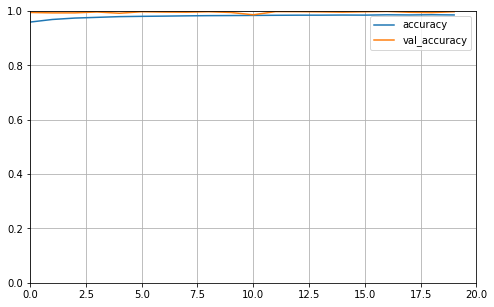

In [22]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

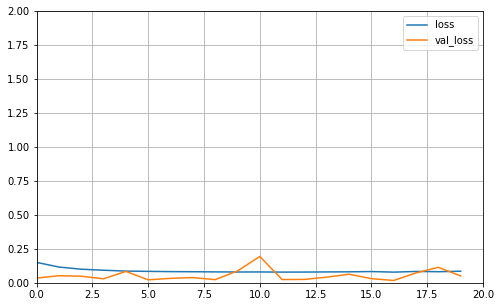

In [23]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [24]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(32, 32)
    image = tf.image.resize(image, [24, 24])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [25]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

This is Riven


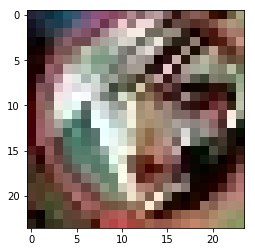

In [26]:
test_pic_path2 = "./lol_data_1/test/Riven/1935.jpg"
evaluate_single_pic(test_pic_path2, True)